In [58]:
# Import required packages
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import seaborn as sb
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import pandas as pd
import numpy as np
#to plot within notebook
%matplotlib inline 
%pylab inline
#setting figure size
from matplotlib.pylab import rcParams 
#for normalizing data
from sklearn.preprocessing import MinMaxScaler 

Populating the interactive namespace from numpy and matplotlib


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Business understanding
The stock market is dependent on many factors and because of this dependency, the prediction of the stock market is very complicated. However, many data is generated every second from multiple sources that may help to predict the stock market using advanced machine learning algorithm. In this code, I represent a method which can help to predict the stock market. In this project, I will respond to 3 questions:

## Question 1: 
- How did the stock market (close column) change from May 2019 to June 2019?

## Question 2: 
- How did the stock market (close column) change from August 2004 to June 2018?

## Question 3: 
- Is there any way to predict the stock market (close column) from May to July 2019?

In [59]:
# downloading the Alphabet stock data in 1 hour intervals
ts = TimeSeries(key='QM6G54H15VWV99R1',output_format='pandas')
ticker='GOOGL'
data, meta_data = ts.get_intraday(symbol=ticker,interval='60min', outputsize='full')

# Data understanding

Following cells provide some stats about the data like mean and std deviations of the different features

In [60]:
#data structure
meta_data

{'1. Information': 'Intraday (60min) open, high, low, close prices and volume',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-08-21 15:30:00',
 '4. Interval': '60min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 2019-05-29 09:30:00 to 2019-08-21 15:30:00
Data columns (total 5 columns):
1. open      417 non-null float64
2. high      417 non-null float64
3. low       417 non-null float64
4. close     417 non-null float64
5. volume    417 non-null float64
dtypes: float64(5)
memory usage: 19.5+ KB


In [62]:
data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,417.000000,417.000000,417.000000,417.000000,4.170000e+02
mean,1135.873484,1139.245495,1132.450659,1135.813021,1.896763e+05
std,50.888710,51.393094,50.821753,51.044789,1.847227e+05
min,1031.490000,1036.000000,1027.030000,1031.689900,0.000000e+00
25%,1098.040000,1100.920000,1095.580000,1097.332500,1.008760e+05
50%,1133.180100,1136.490600,1130.660000,1133.295000,1.440890e+05
75%,1172.145000,1177.180100,1168.720000,1171.885000,2.267320e+05
max,1257.370000,1268.394000,1250.360000,1257.480000,2.765041e+06


In [63]:
#show few rows and columns of the df
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-05-29 09:30:00,1132.70,1135.0000,1123.2300,1125.8408,0.0
2019-05-29 10:30:00,1125.74,1126.0100,1114.9900,1115.2950,259632.0
2019-05-29 11:30:00,1115.28,1117.8101,1112.7357,1115.9150,205957.0
2019-05-29 12:30:00,1115.98,1118.4500,1111.9500,1116.5250,180455.0
2019-05-29 13:30:00,1117.04,1120.6100,1116.8199,1119.2900,112875.0


In [64]:
data.tail()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2019-08-21 11:30:00,1195.5900,1196.6801,1194.0000,1195.980,52044.0
2019-08-21 12:30:00,1195.9399,1197.2400,1195.1000,1195.100,37343.0
2019-08-21 13:30:00,1195.2700,1195.5500,1191.2600,1195.520,50818.0
2019-08-21 14:30:00,1195.2600,1195.2600,1187.9200,1191.235,74026.0
2019-08-21 15:30:00,1191.2900,1192.4399,1189.6801,1191.770,101960.0


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


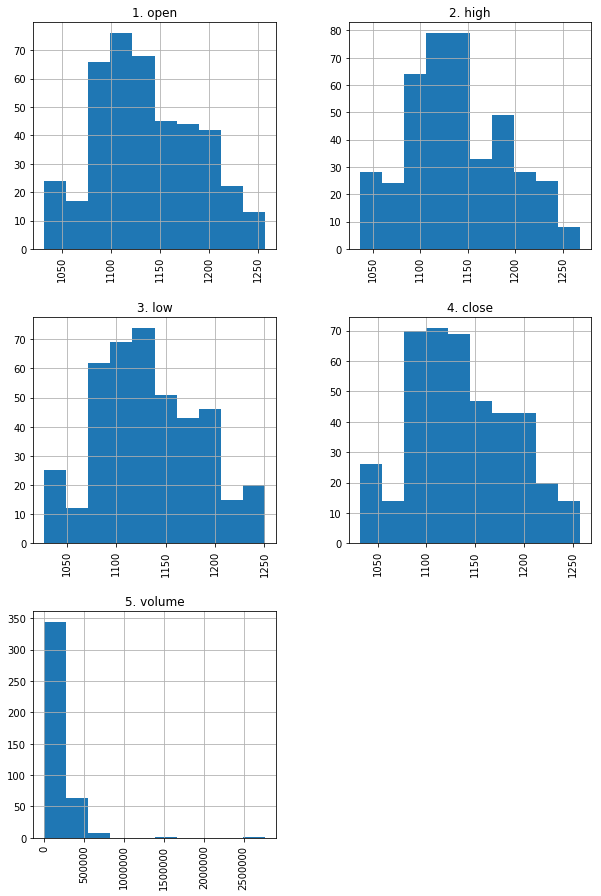

In [65]:
#plot the histogram graph of all columns
fig = plt.figure(figsize = (10,15));
ax = fig.gca();
data.hist(ax = ax,xrot=90);

In [66]:
def display (df_col,ticker,time_and_unit):
    # df_col: write the a specific column of a dataframe in this format: df["col"]
    # ticker: name of ticker in a format like 'GOOGL'
    # time_and_unit: write the time interval and its unit, ex. '60 min'
    plt.figure(figsize=(15,10));
    df_col.plot();
    plt.title('Intraday Times Series for the close '+ticker+' stock price in '+time_and_unit+" interval", size=14);
    plt.xlabel('Time',size= 14);
    plt.ylabel('Price [$]',size= 14);
    plt.xticks(rotation=45, ha='right', size= 10);
    plt.show()

## Answer to question 1

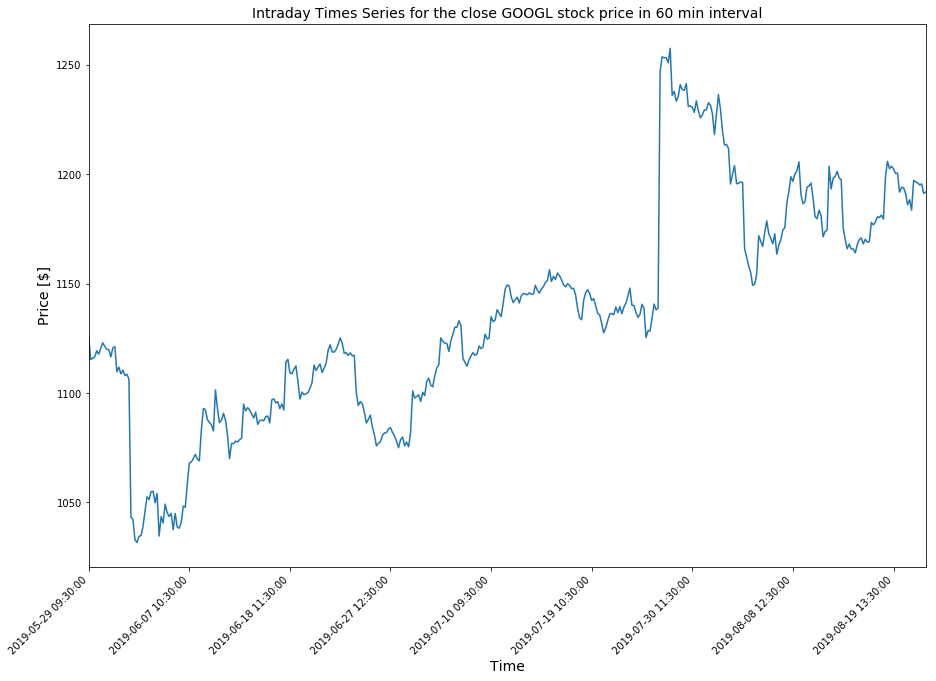

In [67]:
display (data['4. close'],'GOOGL','60 min')

In [68]:
# Analysis on daily price data
# get the full data from 2004 to 2019
data_GOOGL, meta_data = ts.get_daily(symbol='GOOGL', outputsize='full')
data_GOOGL.columns=['Open','High','Low','Close','Volume']
data_GOOGL.index.name='Date'

In [69]:
meta_data

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
 '2. Symbol': 'GOOGL',
 '3. Last Refreshed': '2019-08-21',
 '4. Output Size': 'Full size',
 '5. Time Zone': 'US/Eastern'}

In [70]:
data_GOOGL.head()

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,100.0000,104.06,95.96,100.34,44659000.0
2004-08-20,101.4800,109.08,108.31,108.31,22834300.0
2004-08-23,110.7698,113.48,109.40,109.40,18256100.0
2004-08-24,111.2400,111.60,104.87,104.87,15247300.0
2004-08-25,104.9600,108.00,106.00,106.00,9188600.0


In [71]:
data_GOOGL.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2019-08-15,1168.43,1176.4200,1163.00,1169.3200,1425300.0
2019-08-16,1180.79,1183.8400,1173.00,1179.2100,1245800.0
2019-08-19,1191.83,1209.3900,1190.40,1200.4399,1222500.0
2019-08-20,1195.35,1198.0000,1183.05,1183.5300,1010300.0
2019-08-21,1180.79,1200.5568,1188.00,1191.5800,643585.0


In [72]:
data_GOOGL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3778 entries, 2004-08-19 to 2019-08-21
Data columns (total 5 columns):
Open      3778 non-null float64
High      3778 non-null float64
Low       3778 non-null float64
Close     3778 non-null float64
Volume    3778 non-null float64
dtypes: float64(5)
memory usage: 177.1+ KB


In [73]:
data_GOOGL.describe()

,Open,High,Low,Close,Volume
count,3778.000000,3778.000000,3778.000000,3778.000000,3.778000e+03
mean,647.075136,653.063414,643.691000,646.889544,7.262034e+06
std,267.901302,269.505241,264.522701,267.954208,8.045190e+06
min,99.090000,101.740000,95.960000,100.010000,5.206000e+05
25%,472.392500,477.574000,472.085000,472.085000,2.011700e+06
50%,584.975000,588.850000,582.480000,583.690000,4.555500e+06
75%,807.487500,813.490000,804.957750,808.155000,9.331350e+06
max,1289.120000,1296.975000,1271.710000,1296.200000,8.215110e+07


C:\Users\pouya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


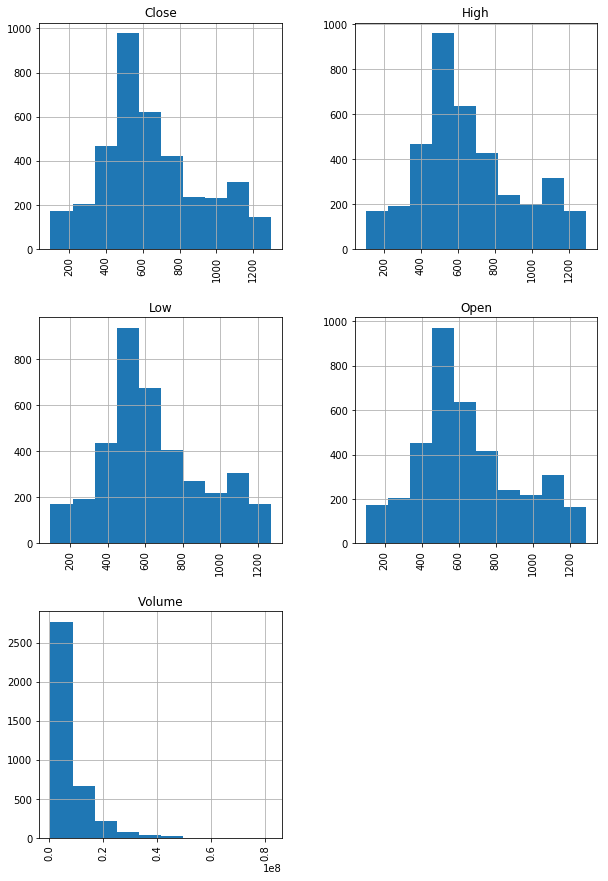

In [74]:
fig = plt.figure(figsize = (10,15));
ax = fig.gca();
data_GOOGL.hist(ax = ax,xrot=90);

In [75]:
data_GOOGL_close=data_GOOGL[['Close']]

In [76]:
data_GOOGL_close.head()

,Close
Date,
2004-08-19,100.34
2004-08-20,108.31
2004-08-23,109.40
2004-08-24,104.87
2004-08-25,106.00


## Answer to question 2

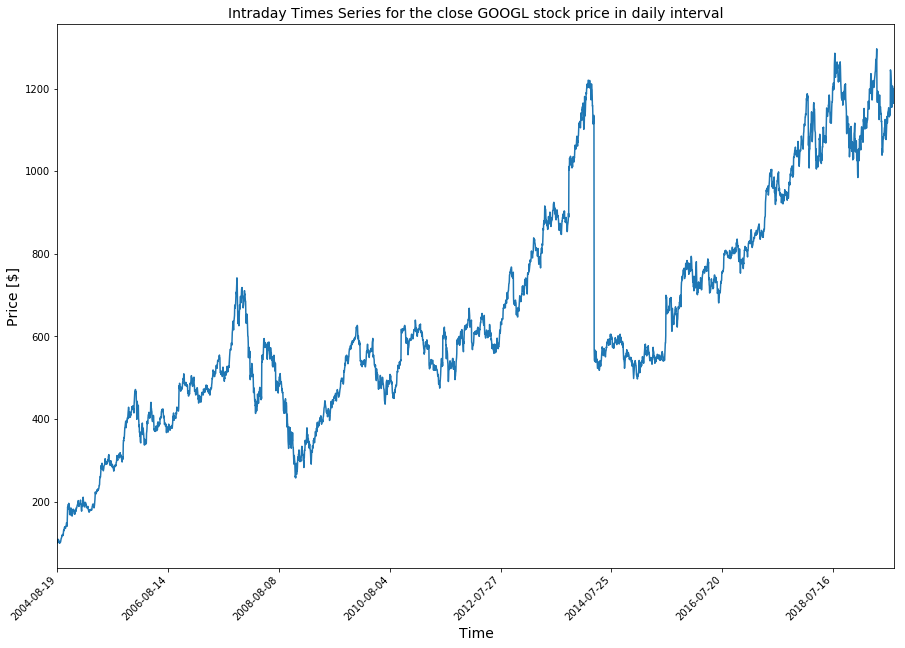

In [77]:
display (data_GOOGL['Close'], 'GOOGL','daily')

In [21]:
data_GOOGL['Date'] = pd.to_datetime(data_GOOGL.index,format='%Y-%m-%d')
data_GOOGL.head()

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2004-08-19,100.0000,104.06,95.96,100.34,44659000.0,2004-08-19
2004-08-20,101.4800,109.08,108.31,108.31,22834300.0,2004-08-20
2004-08-23,110.7698,113.48,109.40,109.40,18256100.0,2004-08-23
2004-08-24,111.2400,111.60,104.87,104.87,15247300.0,2004-08-24
2004-08-25,104.9600,108.00,106.00,106.00,9188600.0,2004-08-25


# Data preparation
In this project, the "Close" column does not have any misisng data or any categorical data. 

## resolving missing values problem
If there are some missing values, do not fill it with other values! Just delete them. Because each value is connected to a specific time. So, you may not be able to calculate or guess a missing value using other values! In this project, I do not see any disadvantage in dropping a misisng value, however, filling a wrong number instead of a misisng value may ends up a wrong prediction. 

## resolving categorical variables problem
If you have some categircal variables in your dataset, you need to categroize it and use the one-hot encoding. 

## other problems
There are other types of data preprations such as having features with different range of values. In this case you must use a scaler method to make sure all the features are in the same range. Otherwise, some features will control the Machine Learning training. 
Please also be careful about duplicates and outliers. 


# Data modeling

In [ ]:
# single output-direct
df=data_GOOGL
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# split data for testing for plotting
train = dataset[0:-60,:]
valid = dataset[-60:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#normilizing prices
scaled_data = scaler.fit_transform(dataset)

# splitting the dataset to train and test
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data to 3D for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = []
y_test=[]

#predicting 1 value, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=2,validation_data=(X_test, y_test))


closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [22]:
#storing model
import pickle
#pickle.dump(model, open("direct", 'wb'))
 
# load the model from disk
model = pickle.load(open("direct", 'rb'))

C:\Users\pouya\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [23]:
# assuming model is loaded
df=data_GOOGL
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import pandas as pd
#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# split data for testing for plotting
train = dataset[0:-60,:]
valid = dataset[-60:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
#normilizing prices
scaled_data = scaler.fit_transform(dataset)

# splitting the dataset to train and test
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape data to 3D for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
X_test = []
y_test=[]

#predicting 1 value, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    y_test.append(inputs[i,0])
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\pouya\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Answer to question 3

# Results evaluation
I use the visualization method to compare the predicted and actual values. 

C:\Users\pouya\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


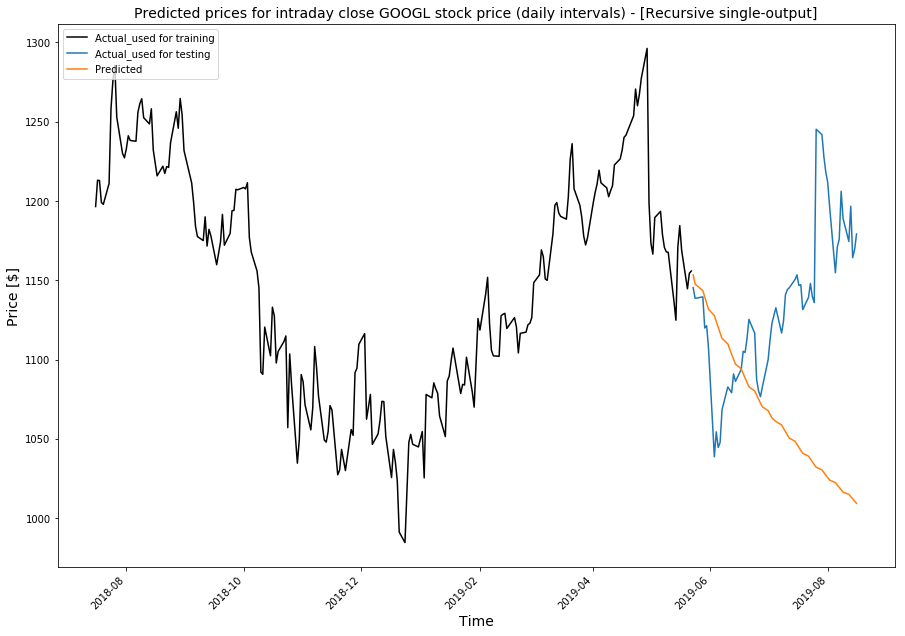

In [35]:
# plot the Recursive (single-output) predictions
closing_price=model.predict(x_train[-1:])
for i in range(1,60):
    xx=np.append(x_train[-1:][:][0][i:], closing_price, axis = 0)

    closing_price=np.append(closing_price,model.predict(np.reshape(xx, (xx.shape[1],xx.shape[0],1))), axis = 0)
closing_price = scaler.inverse_transform(closing_price)
train = new_data[3500:-60]
valid = new_data[-60:]
valid['Predictions'] = closing_price
plt.figure(figsize=(15,10));
plt.plot(train['Close'],c="black")
plt.plot(valid[['Close','Predictions']])
plt.legend(['Actual_used for training','Actual_used for testing', 'Predicted'], loc='upper left')
plt.title('Predicted prices for intraday close '+ticker+' stock price (daily intervals) - [Recursive single-output]', size=14);
plt.xlabel('Time',size= 14);
plt.ylabel('Price [$]',size= 14);
plt.xticks(rotation=45, ha='right', size= 10);
plt.show()

# Conclusion and Discussion
It is very difficult to predict the stock market data. We need to:
- try other models
- consider other factors such as impacts of political movments in the world on economy